# Visualization

In [1]:
# to PCA descriptors but need to do normalization
# MDS = multidimensional scaling
# tsne narozdiel od MDS sa snazi zachovat vzdialenosti medzi bodmi

In [2]:
# rdkit mols are displayed as images
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import AllChem as Chem
from rdkit import DataStructs

# descriptors
from rdkit import Chem
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import MACCSkeys
from itertools import chain


# diversity picker
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

# plots
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# scikit learn
# conda install -c conda-forge scikit-learn 
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
import umap

# other packages
import pandas as pd
import numpy as np
import gzip
import csv
import re

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.error')

PCA, MDS, tsne using sklearn library with df.csv and similarity matrix -> to distance matrix



In [3]:

# load data
df = pd.read_csv('../data/df.csv')

# load similarity matrix
similarity_matrix = np.load('../data/similarity_matrix.npy')



In [4]:
df.head()

,Unnamed: 0,Mol,Source,FP,MACCS_keys,tanimoto,MW,LogP,HBA,HBD,TPSA,RB,Picked
0,0,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509f50>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.119266,2180.317,-8.11643,29,28,901.57,66,False
1,1,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc509fc0>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.098361,1269.433,-3.10570,16,17,495.89,31,False
2,2,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a030>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.118812,1069.238,-4.13203,15,14,435.41,19,False
3,3,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a0a0>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.129630,1431.064,-0.50613,16,17,495.67,38,False
4,4,<rdkit.Chem.rdchem.Mol object at 0x7f7dfc50a110>,drugbank,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[False, False, False, False, False, False, Fal...",0.058824,1202.635,3.26900,12,5,278.80,15,False


In [5]:
# create distance matrix from similarity matrix
dist_matrix = 1 - similarity_matrix

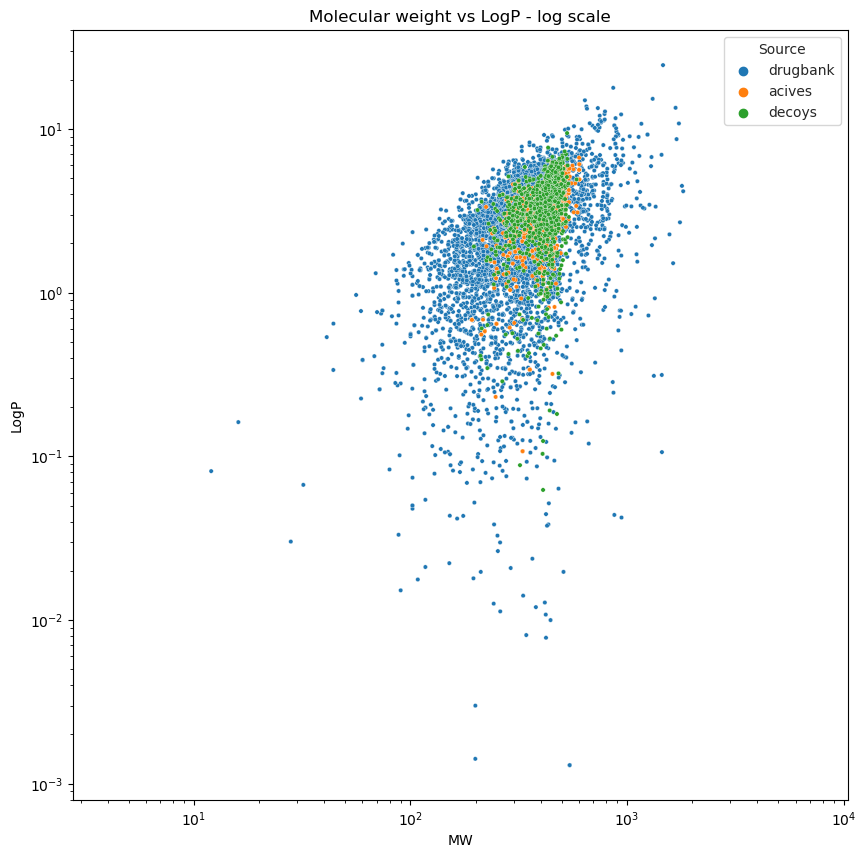

In [6]:
# use df_most_diverse and create plot and visualize from which sourceare the strucutres
# x = MW, y = LogP hue = source
# seaborn plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
# log axes for MW and LogP
ax.set_xscale('log')
ax.set_yscale('log')
# scatter plot without drugbank
sns.scatterplot(x='MW', y='LogP', hue='Source', data=df, s=10)
ax.title.set_text('Molecular weight vs LogP - log scale')
plt.show()

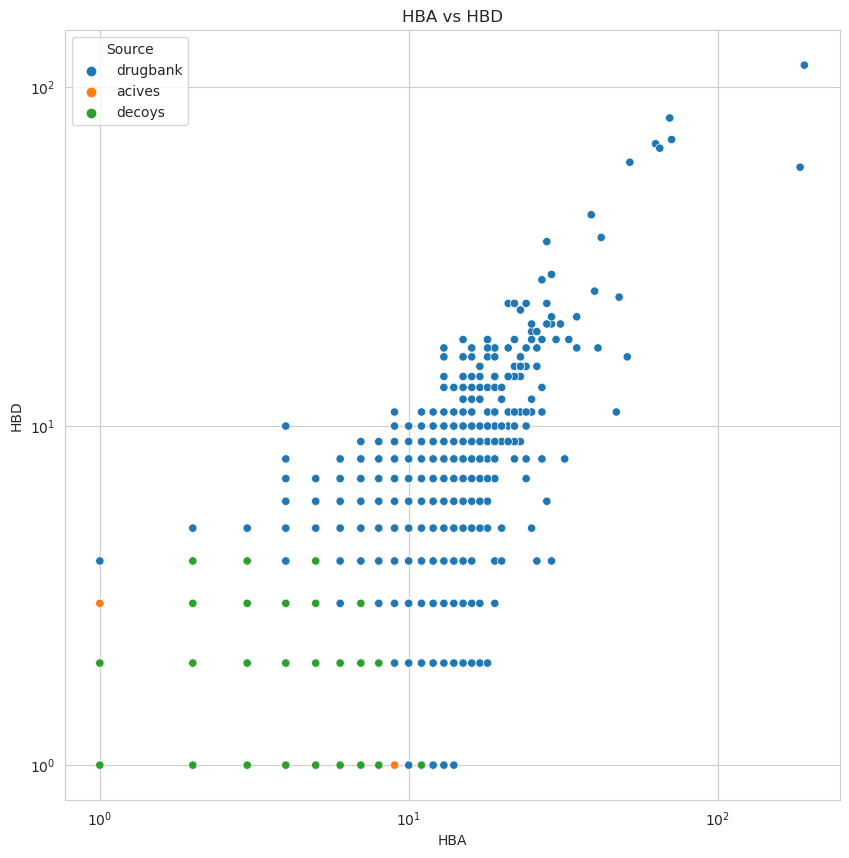

In [7]:
# in the same manner visualize HBA and HBD seaborn plot

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_style("whitegrid")
# axes with HBA and HBD
# log axes
ax.set_xscale('log')
ax.set_yscale('log')
sns.scatterplot(x='HBA', y='HBD', hue='Source', data=df)
ax.title.set_text('HBA vs HBD')
plt.show()



# PCA

In [8]:
# we will use PCA for dimensionality reduction on distance matrix
pca = decomposition.PCA(n_components=2)
pca.fit(dist_matrix)
pca_data = pca.transform(dist_matrix)
pca_data = pd.DataFrame(pca_data)
pca_data.columns = ['PC1', 'PC2']
pca_data['Source'] = df['Source']




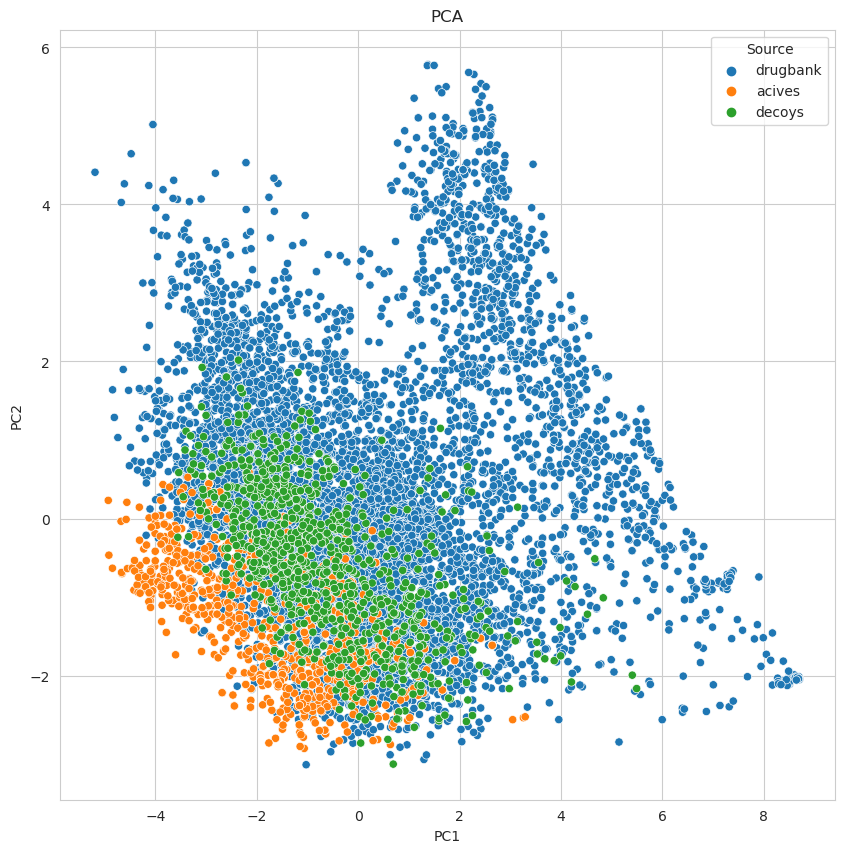

In [9]:
# plot first two components
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1', y='PC2', hue='Source', data=pca_data)
ax.title.set_text('PCA')
plt.show()

# MDS 
Multidimensional Scaling 



sparse_mat = distance.pdist(list(df["fps"]),metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)



In [10]:
# add column with source
df['Source'] = pca_data['Source']

In [15]:
dist_matrix.shape

(8871, 8871)

# t-SNE 
t-distributed stochastic neighbor embedding is another popular method to show similar instances close together and dissimilar far. We can recycle distances calculated for MDS.

In [21]:
clf = manifold.TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=1)
tsne_data = clf.fit_transform(dist_matrix)
df = df.join(pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2']))


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8871 samples in 0.092s...
[t-SNE] Computed neighbors for 8871 samples in 43.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8871
[t-SNE] Computed conditional probabilities for sample 2000 / 8871
[t-SNE] Computed conditional probabilities for sample 3000 / 8871
[t-SNE] Computed conditional probabilities for sample 4000 / 8871
[t-SNE] Computed conditional probabilities for sample 5000 / 8871
[t-SNE] Computed conditional probabilities for sample 6000 / 8871
[t-SNE] Computed conditional probabilities for sample 7000 / 8871
[t-SNE] Computed conditional probabilities for sample 8000 / 8871
[t-SNE] Computed conditional probabilities for sample 8871 / 8871
[t-SNE] Mean sigma: 1.192767
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.644165
[t-SNE] KL divergence after 1000 iterations: 1.627482


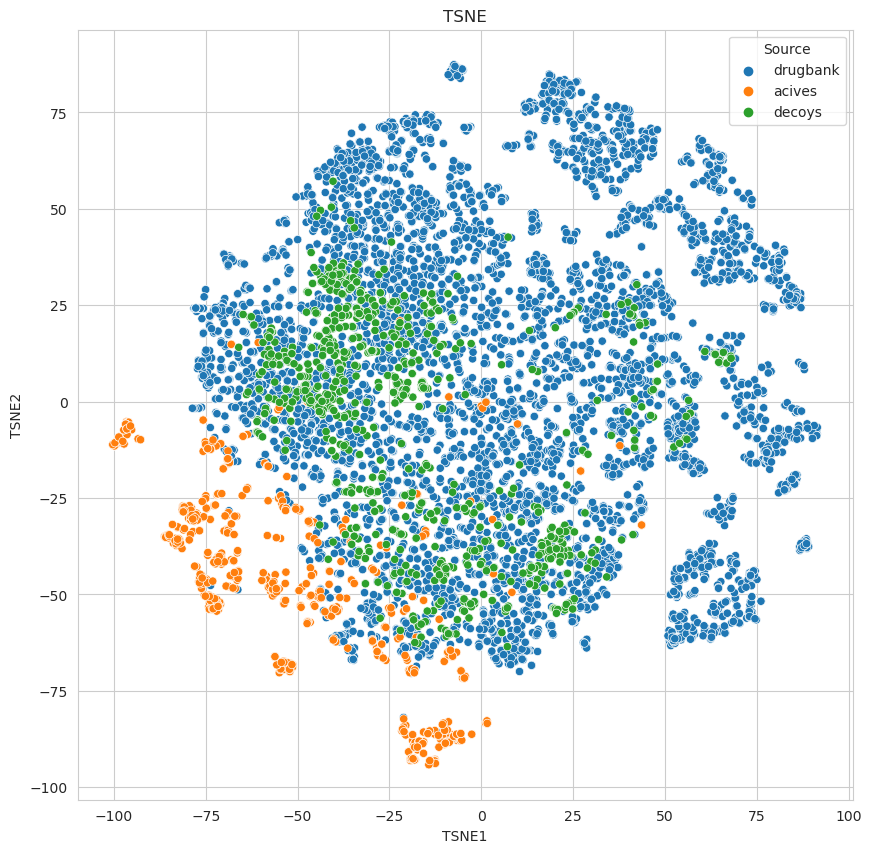

In [22]:
# plot first two components
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_style("whitegrid")
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Source', data=df)
ax.title.set_text('TSNE')
plt.show()

# UMAP

In [31]:
# similarity matrix loaded from data/similarity_matrix.csv
similarity_matrix = np.load('../data/similarity_matrix.npy')
# use exp to compute the similarity matrix
similarity_matrix = np.exp(similarity_matrix)

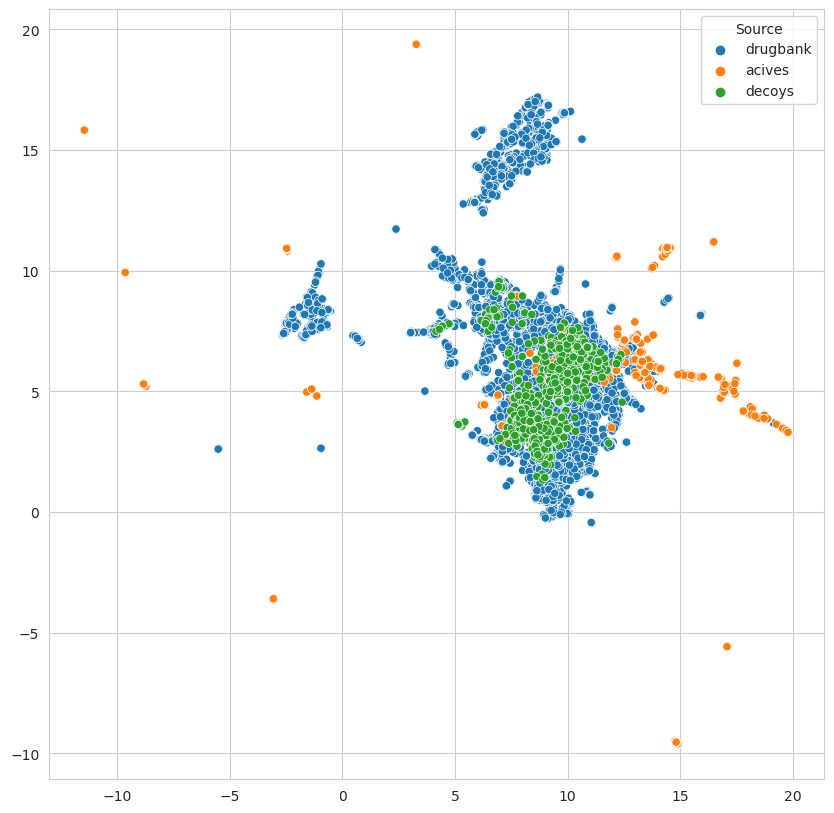

In [34]:
# use UMAP for dimensionality reduction using similarity matrix
reducer = umap.UMAP()
reducer.fit(similarity_matrix)
embedding = reducer.transform(similarity_matrix)

# plot the embedding using seaborn
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_style("whitegrid")
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['Source'])
plt.show()



